In [2]:
import pandas as pd
import gdown
import ipaddress
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler


In [7]:
# Load Fraud_Data, Credit Card Data, and IP-to-Country data
fraud_df = pd.read_csv("/content/Fraud_Data.csv")
creditcard_df = pd.read_csv("/content/creditcard1.csv")
ip_country_df = pd.read_csv("/content/IpAddress_to_Country.csv")


In [8]:
# ============================================================
# STEP 3: Data Cleaning - IP Address to Country Data
# ============================================================

# Convert lower_bound_ip_address to integer (it was a float)
ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].astype(int)


In [9]:
# ============================================================
# STEP 4: Data Cleaning - Fraud Data
# ============================================================

# Remove duplicate rows from fraud_df (if any)
fraud_df.drop_duplicates(inplace=True)

# Check for missing values and print a summary
print("Missing values in Fraud Data:")
print(fraud_df.isna().sum())

# Convert timestamp columns to datetime objects.
# (Assuming columns are named 'signup_time' and 'purchase_time')
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'], errors='coerce')
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'], errors='coerce')


Missing values in Fraud Data:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [10]:
# ============================================================
# STEP 5: Convert IP Address Strings to Integer
# ============================================================

# Define a function that converts an IPv4 address (string) to an integer.
def ip_to_int(ip_str):
    try:
        return int(ipaddress.IPv4Address(ip_str))
    except Exception:
        return np.nan

# Apply the conversion to create a new column 'ip_int'
fraud_df['ip_int'] = fraud_df['ip_address'].apply(ip_to_int)


In [11]:
# ============================================================
# STEP 6: Merge Fraud Data with IP-to-Country Data
# ============================================================

# Define a function that maps an IP (as an integer) to a country using the IP ranges
def map_ip_to_country(ip_int):
    # Find the row in ip_country_df where ip_int falls between the lower and upper bounds
    row = ip_country_df[(ip_country_df['lower_bound_ip_address'] <= ip_int) &
                        (ip_country_df['upper_bound_ip_address'] >= ip_int)]
    if not row.empty:
        return row.iloc[0]['country']
    else:
        return np.nan

# Create a new column 'country' in fraud_df by applying the mapping function
fraud_df['country'] = fraud_df['ip_int'].apply(map_ip_to_country)

# Save the merged DataFrame to a CSV file named 'merged_ip.csv'
fraud_df.to_csv("merged_ip.csv", index=False)

print("Merged file saved as merged_ip.csv")


Merged file saved as merged_ip.csv


In [12]:

# ============================================================
# STEP 7: Feature Engineering - Time-Based Features
# ============================================================

# Extract the hour of day and day of week from the purchase_time column
fraud_df['purchase_hour'] = fraud_df['purchase_time'].dt.hour
fraud_df['purchase_dayofweek'] = fraud_df['purchase_time'].dt.dayofweek


In [13]:
# ============================================================
# STEP 8: Normalize a Key Feature (purchase_value)
# ============================================================

# Using MinMaxScaler to normalize the 'purchase_value' column (assumed to be the purchase amount)
scaler = MinMaxScaler()
# Reshape is required because scaler expects a 2D array
fraud_df['purchase_value_scaled'] = scaler.fit_transform(fraud_df[['purchase_value']])


In [14]:
# ============================================================
# STEP 9: Exploratory Data Analysis (EDA) - Quick Look
# ============================================================

# Print a summary of the fraud dataset to inspect data types and new columns
print("\nFraud Data Info:")
print(fraud_df.info())

# Display the first few rows to verify the changes
print("\nFraud Data Sample:")
print(fraud_df.head())

# Optionally, you can also print summary statistics
print("\nFraud Data Summary Statistics:")
print(fraud_df.describe())



Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                151112 non-null  int64         
 1   signup_time            151112 non-null  datetime64[ns]
 2   purchase_time          151112 non-null  datetime64[ns]
 3   purchase_value         151112 non-null  int64         
 4   device_id              151112 non-null  object        
 5   source                 151112 non-null  object        
 6   browser                151112 non-null  object        
 7   sex                    151112 non-null  object        
 8   age                    151112 non-null  int64         
 9   ip_address             151112 non-null  float64       
 10  class                  151112 non-null  int64         
 11  ip_int                 0 non-null       float64       
 12  country                0 n

In [15]:
# ============================================================
# STEP 10: (Optional) Quick EDA on Credit Card Data
# ============================================================

print("\nCredit Card Data Info:")
print(creditcard_df.info())
print("\nCredit Card Data Sample:")
print(creditcard_df.head())


Credit Card Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 

In [16]:
# Save the cleaned and merged Fraud Data with IP-to-Country information
fraud_df.to_csv("cleaned_fraud_data.csv", index=False)
print("Cleaned fraud data saved as 'cleaned_fraud_data.csv'.")

# Save the cleaned Credit Card Data as well
creditcard_df.to_csv("cleaned_creditcard_data.csv", index=False)
print("Cleaned credit card data saved as 'cleaned_creditcard_data.csv'.")

# (Optional) Save the cleaned IP-to-Country data if needed
ip_country_df.to_csv("cleaned_ip_country_data.csv", index=False)
print("Cleaned IP-to-Country data saved as 'cleaned_ip_country_data.csv'.")


Cleaned fraud data saved as 'cleaned_fraud_data.csv'.
Cleaned credit card data saved as 'cleaned_creditcard_data.csv'.
Cleaned IP-to-Country data saved as 'cleaned_ip_country_data.csv'.


In [1]:
print("hello world task 3 4 5 are started ")

hello world task 3 4 5 are started 


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# Load dataset
df_cc = pd.read_csv(r"C:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W8\data\cleaned_creditcard_data.csv")
df_cc = df_cc.dropna(subset=['Class'])

# Separate features and target
X = df_cc.drop('Class', axis=1)
y = df_cc['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify dimensions
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("Number of features in X:", X.shape[1])
print("Length of feature_names:", len(X.columns))

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Check the shape of shap_values[1] against X_test_scaled
print("SHAP values shape for fraud class:", shap_values[1].shape)

# Now plot only if dimensions match
if shap_values[1].shape[1] == X_test_scaled.shape[1]:
    shap.summary_plot(shap_values[1], X_test_scaled, feature_names=X.columns)
else:
    print("Dimension mismatch: SHAP values have {} features while X_test_scaled has {} features.".format(
        shap_values[1].shape[1], X_test_scaled.shape[1]
    ))

# Optionally, force plot for the first sample (if dimensions match)
if shap_values[1].shape[1] == X_test_scaled.shape[1]:
    shap.initjs()
    shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X_test_scaled[0, :], feature_names=X.columns)


X_train_scaled shape: (6377, 30)
X_test_scaled shape: (1595, 30)
Number of features in X: 30
Length of feature_names: 30
SHAP values shape for fraud class: (30, 2)
Dimension mismatch: SHAP values have 2 features while X_test_scaled has 30 features.


c:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W8\newvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading...
From: https://drive.google.com/uc?id=1ss2Z652HsJosA-iHJW7Pbd5ZsXvIFNjN
To: c:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W8\notebooks\dataset.csv
100%|██████████| 4.19M/4.19M [00:00<00:00, 4.74MB/s]



✅ Data loaded successfully!
Dataset shape: (7973, 31)
Dataset columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.1

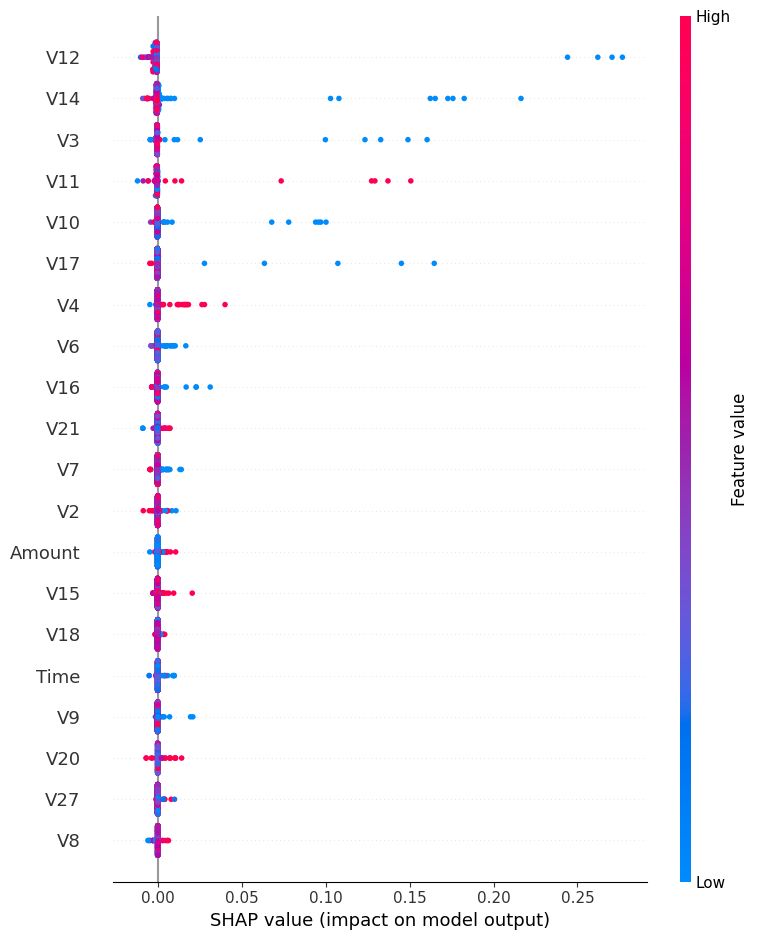


✅ Force plot saved as 'force_plot_sample.html'.


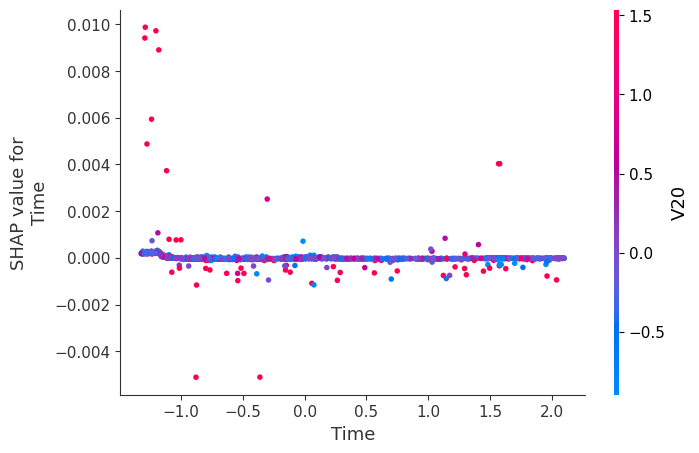

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import gdown
import shap
import matplotlib.pyplot as plt
import pickle  # ✅ Added for saving the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Step 2: Download the dataset from Google Drive using gdown
url = "https://drive.google.com/uc?id=1ss2Z652HsJosA-iHJW7Pbd5ZsXvIFNjN"
output = "dataset.csv"
gdown.download(url, output, quiet=False)

# Step 3: Load the dataset into a DataFrame
df = pd.read_csv("dataset.csv")
print("\n✅ Data loaded successfully!")
print("Dataset shape:", df.shape)
print("Dataset columns:", df.columns.tolist())

# Display first few rows for verification
print("\nFirst 5 rows:")
print(df.head())

# Step 4: Preprocessing - Drop missing values in the target column
df = df.dropna(subset=['Class'])
print("\n✅ After dropping missing target values, dataset shape:", df.shape)

# Step 5: Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Step 6: Train-test split (80/20 split, stratified to balance fraud cases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\n✅ Train-test split completed:")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Step 7: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("\n✅ Random Forest model trained.")

# ✅ Step 9: Save the Model and Scaler for Future Use
with open("fraud_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)
    
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\n✅ Model and Scaler saved successfully as 'fraud_model.pkl' and 'scaler.pkl'.")

# Step 10: Compute SHAP values using TreeExplainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)
print("\n✅ SHAP values computed.")

# Step 11: Debugging - Check SHAP values dimensions
print("\n📌 Dimension check:")
print("X_test_scaled shape:", X_test_scaled.shape)
print("Number of features in X:", X.shape[1])
print("SHAP values shape:", shap_values.shape)  # Should be (1595, 30, 2) for binary classification

# Step 12: Correct SHAP values selection for class 1 (Fraud)
shap_values_corrected = shap_values[:, :, 1]  # Selecting class 1

# Confirming the new shape
print("✅ Corrected SHAP values shape:", shap_values_corrected.shape)  # Should be (1595, 30)

# Step 13: SHAP Summary Plot (Feature Importance)
shap.summary_plot(shap_values_corrected, X_test_scaled, feature_names=X.columns)

# Step 14: SHAP Force Plot for a single prediction (optional)
shap.initjs()  # Initialize JavaScript for Jupyter
force_plot = shap.force_plot(explainer.expected_value[1], shap_values_corrected[0, :], X_test_scaled[0, :], feature_names=X.columns)

# Save force plot as an HTML file (if not in Jupyter)
shap.save_html("force_plot_sample.html", force_plot)
print("\n✅ Force plot saved as 'force_plot_sample.html'.")

# Step 15: SHAP Dependence Plot (Feature Interaction Example)
shap.dependence_plot(0, shap_values_corrected, X_test_scaled, feature_names=X.columns)


In [1]:
# Step 1: Import required libraries
import pickle
import numpy as np
import pandas as pd
import shap
import logging
from flask import Flask, request, jsonify

# Step 2: Initialize Flask app
app = Flask(__name__)

# Step 3: Configure logging for tracking requests & errors
logging.basicConfig(filename='api.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Step 4: Load the trained model and scaler
model_path = r"C:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W8\notebooks\fraud_model.pkl"
scaler_path = r"C:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W8\notebooks\scaler.pkl"

with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

with open(scaler_path, 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Step 5: Define API route to predict fraud
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON request data
        data = request.get_json()

        # Convert data into DataFrame
        input_data = pd.DataFrame([data])

        # Scale the input
        scaled_input = scaler.transform(input_data)

        # Make prediction (returns probability for fraud class 1)
        fraud_probability = model.predict_proba(scaled_input)[0][1]

        # Log prediction
        logging.info(f"Prediction: {fraud_probability}, Input Data: {data}")

        # Return fraud probability as JSON response
        return jsonify({'fraud_probability': fraud_probability})
    
    except Exception as e:
        logging.error(f"Error processing request: {str(e)}")
        return jsonify({'error': str(e)}), 500

# Step 6: Run the Flask app
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)


c:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W8\newvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 * Serving Flask app '__main__'
 * Debug mode: on


SystemExit: 1

c:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W8\newvenv\Lib\site-packages\IPython\core\interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
